<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/homework/sales_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:

df = pd.read_csv("/content/sample_data/sales data.csv")
df  # print(df) 와 동일

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [35]:

# 결측치 확인
df.isnull().sum()

# 결측치 제거
df = df.dropna()
df.isnull().sum()

df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [36]:
# 데이터 불러오기

X = df.drop('Delicassen', axis=1) # 입력 데이터 (features)
y = df['Delicassen'] # 정답 데이터 (target)


X = X.select_dtypes(include=np.number)

# 데이터를 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤포레스트
- 결정트리의 집합의 모임

- 과적합 우려: 억제를 위해 배깅(중복추출) 기법 활용.
- 부트스트래핑은 배깅이라는 앙상블 기법의 구성 요소.

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error # Import mean_squared_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# from sklearn.metrics import accuracy_score # Remove accuracy_score import

ry_preds = model.predict(X_test)
# print('Accuracy Score', accuracy_score(ry_preds, y_test)) # Remove accuracy_score calculation

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, ry_preds)
print(f'Random Forest Regressor MSE: {mse:.4f}')

Random Forest Regressor MSE: 6682545.6633


In [38]:


import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# 선형회귀-산점도
- 직선의 방정식(선형방정식) 이용
- 종속 변수와 독립변수 사이의 선형 관계를 모델링하는 통계 방법
- 목표: 최적의 직선 찾기
- 장점: 독립변수의 영향 파악에 수월
- 단점: 변수 간의 관계는 반드시 선형

- 과소적합 우려: 모델이 단순한 문제. 해결을 위해 차수를 늘리자 -> 다항 회귀

In [39]:
# 선형 회귀
model = LinearRegression()

model.fit(X_train, y_train) # 인코딩되지 않은 y_train 사용

preds = model.predict(X_test) # 예측 수행

데이터를 시각화하는 중...


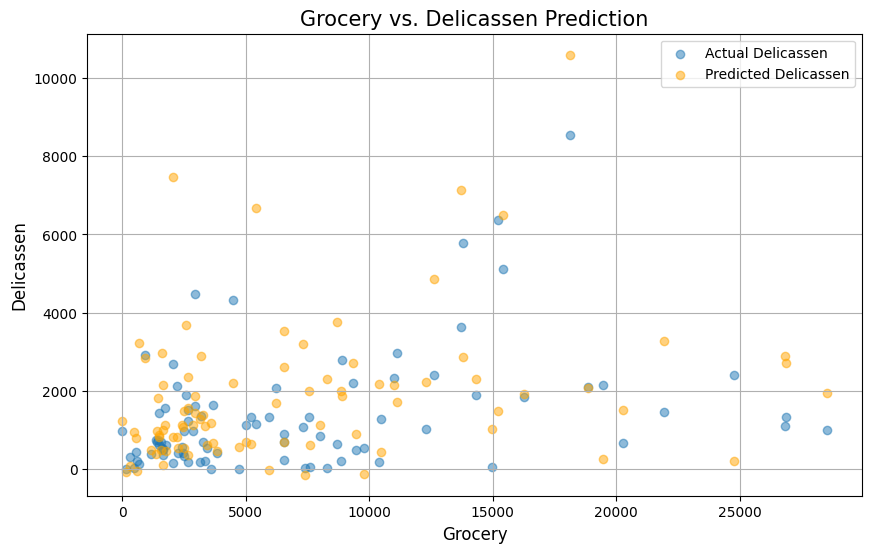

In [40]:
# 시각화 (산점도)

print("데이터를 시각화하는 중...")
plt.figure(figsize=(10, 6))

plt.scatter(X_test['Grocery'], y_test, label='Actual Delicassen', alpha=0.5)

# 예측값(preds)는 이미 수치형 데이터이므로 인코딩된 값을 사용할 필요가 없습니다.
plt.scatter(X_test['Grocery'], preds, color='orange', label='Predicted Delicassen', alpha=0.5)

# 그래프 제목 및 축 레이블 설정
plt.title('Grocery vs. Delicassen Prediction', fontsize=15)
plt.xlabel('Grocery', fontsize=12)
plt.ylabel('Delicassen', fontsize=12)
plt.legend()
plt.grid(True)


plt.show()

In [41]:
# y_test는 이미 수치형 데이터이므로 인코딩된 값을 사용할 필요가 없습니다.
mse = mean_squared_error(y_test, preds) # y_test_encoded 대신 y_test 사용
print(f"\n모델의 평균 제곱 오차 (MSE): {mse:.4f}")


모델의 평균 제곱 오차 (MSE): 2667264.4290


# 결정트리회귀
- 목표: 최적의 분활점 찾기
- 리프노드에 도달 후 샘플의 평균값을 통해 예측

In [45]:


# 데이터 준비
X = df.drop('Delicassen', axis=1) # 입력 데이터 (features)
y = df['Delicassen'] # 정답 데이터 (target)

X = X.select_dtypes(include=np.number)

# 데이터를 훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3결정 트리 회귀 모델 생성 및 학습
# 과적합 방지를 위해 max_depth를 5로 설정
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 4. 예측 및 평가
y_preds = model.predict(X_test)

# MSE(평균 제곱 오차) 계산 및 출력
mse = mean_squared_error(y_test, y_preds)
print(f'결정 트리 회귀 MSE: {mse:.4f}')

결정 트리 회귀 MSE: 3808.2588
